In [44]:
print('Welcome to the training of the pyschological analysis data')

Welcome to the training of the pyschological analysis data


In [72]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
#https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
# Download necessary NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
# Load CSV file
df = pd.read_csv(r'C:\Users\harsh\Downloads\data\Combined Data.csv', 
                 header=None, names=['SNo', 'Problem', 'Result'])

# Drop the first row if it contains headers
df = df.drop(0)

# Convert column data to string and handle missing values
df['Problem'] = df['Problem'].fillna('').astype(str)
df['Result'] = df['Result'].fillna('').astype(str)

In [74]:
print(df['Result'])

1        Anxiety
2        Anxiety
3        Anxiety
4        Anxiety
5        Anxiety
          ...   
53039    Anxiety
53040    Anxiety
53041    Anxiety
53042    Anxiety
53043    Anxiety
Name: Result, Length: 53043, dtype: object


In [6]:
print(df.head())

   SNo                                            Problem   Result
1  0.0                                         oh my gosh  Anxiety
2  1.0  trouble sleeping, confused mind, restless hear...  Anxiety
3  2.0  All wrong, back off dear, forward doubt. Stay ...  Anxiety
4  3.0  I've shifted my focus to something else but I'...  Anxiety
5  4.0  I'm restless and restless, it's been a month n...  Anxiety


In [75]:
# Define the normalization function
def normalizeString(data):
    if not isinstance(data, str):  
        data = str(data)  # Convert non-string values to string
    
    data = data.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    data = data.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))  # Get English stopwords
    data = ' '.join(word for word in data.split() if word not in stop_words)  # Remove stopwords
    return data

# Apply normalization
df['Problem'] = df['Problem'].apply(normalizeString)
df['Result'] = df['Result'].apply(normalizeString)

In [20]:
print(df.head())

   SNo                                            Problem   Result
1  0.0                                            oh gosh  anxiety
2  1.0  trouble sleeping confused mind restless heart ...  anxiety
3  2.0  wrong back dear forward doubt stay restless re...  anxiety
4  3.0  ive shifted focus something else im still worried  anxiety
5  4.0                im restless restless month boy mean  anxiety


In [21]:
print(df.shape)

(53043, 3)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf_vectorizer = TfidfVectorizer()
X=tfidf_vectorizer.fit_transform( df['Problem'])

In [30]:
Y=df['Result']

In [11]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.7,random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [54]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracylr=accuracy_score(y_test,y_pred)
classification_reportlr=classification_report(y_test, y_pred)
confusion_matrixlr=confusion_matrix(y_test, y_pred)
print('Accuracy:',accuracylr)
print('Classification_report',classification_reportlr)
print('Confusion_matrix',confusion_matrixlr)

Accuracy: 0.7271013438905497
Classification_report                       precision    recall  f1-score   support

             anxiety       0.81      0.68      0.74      2727
             bipolar       0.87      0.59      0.71      2011
          depression       0.67      0.73      0.70     10768
              normal       0.77      0.96      0.85     11476
personality disorder       0.97      0.23      0.37       849
              stress       0.73      0.30      0.42      1869
            suicidal       0.67      0.59      0.63      7431

            accuracy                           0.73     37131
           macro avg       0.78      0.58      0.63     37131
        weighted avg       0.73      0.73      0.71     37131

Confusion_matrix [[ 1854    25   286   501     0    38    23]
 [   71  1192   369   295     2    35    47]
 [  115    67  7827   895     1    46  1817]
 [   36    10   246 11001     2    37   144]
 [   31    33   311   220   192    40    22]
 [  173    36   392   

In [43]:
#Random forest Model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_scorerfm=accuracy_score(y_test, y_pred)
classification_reportrfm=classification_report(y_test, y_pred)
confusion_matrixrfm=confusion_matrix(y_test, y_pred)
print('Accuracy:',accuracy_scorerfm)
print('Classification_report',classification_reportrfm)
print('Confusion_matrix',confusion_matrixrfm)

Accuracy: 0.6216099754921763
Classification_report                       precision    recall  f1-score   support

             anxiety       0.91      0.35      0.50      2727
             bipolar       0.97      0.16      0.27      2011
          depression       0.51      0.81      0.63     10768
              normal       0.74      0.90      0.81     11476
personality disorder       0.15      0.19      0.17       849
              stress       0.99      0.09      0.17      1869
            suicidal       0.69      0.33      0.44      7431

            accuracy                           0.62     37131
           macro avg       0.71      0.40      0.43     37131
        weighted avg       0.69      0.62      0.59     37131

Confusion_matrix [[  949     4  1165   540    39     0    30]
 [   26   312  1290   269    79     0    35]
 [   16     3  8741  1084    12     1   911]
 [   15     2   385 10319   703     0    52]
 [    1     1   553   117   163     0    14]
 [   40     0  1046   

In [49]:
#Naiv Bays Model
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
accuracy_scorenbm=accuracy_score(y_test, y_pred)
classification_reportnbm=classification_report(y_test, y_pred,zero_division=0)
confusion_matrixnbm=confusion_matrix(y_test, y_pred)
print('Accuracy:',accuracy_scorenbm )
print('Classification Report:\n', classification_reportnbm)
print('Confusion Matrix:\n',confusion_matrixnbm )

Accuracy: 0.5445584551991597
Classification Report:
                       precision    recall  f1-score   support

             anxiety       0.97      0.10      0.18      2727
             bipolar       0.97      0.01      0.03      2011
          depression       0.39      0.99      0.56     10768
              normal       0.94      0.69      0.80     11476
personality disorder       0.00      0.00      0.00       849
              stress       1.00      0.01      0.02      1869
            suicidal       0.93      0.18      0.30      7431

            accuracy                           0.54     37131
           macro avg       0.74      0.28      0.27     37131
        weighted avg       0.77      0.54      0.49     37131

Confusion Matrix:
 [[  269     0  2319   138     0     0     1]
 [    0    28  1895    88     0     0     0]
 [    1     1 10653    46     0     0    67]
 [    3     0  3504  7937     0     0    32]
 [    2     0   759    88     0     0     0]
 [    2     0  177

In [52]:
#support vector machine
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('classifiction',classification_report(y_test,y_pred))
print('confusion',confusion_matrix(y_test,y_pred))

accuracy 0.7410250195254638
classifiction                       precision    recall  f1-score   support

             anxiety       0.79      0.75      0.77      2727
             bipolar       0.84      0.65      0.74      2011
          depression       0.67      0.73      0.70     10768
              normal       0.82      0.95      0.88     11476
personality disorder       0.95      0.31      0.46       849
              stress       0.66      0.38      0.48      1869
            suicidal       0.67      0.61      0.64      7431

            accuracy                           0.74     37131
           macro avg       0.77      0.62      0.67     37131
        weighted avg       0.74      0.74      0.73     37131

confusion [[ 2053    42   251   302     2    64    13]
 [   78  1308   322   198     1    67    37]
 [  165    99  7811   651     6    82  1954]
 [   56    16   291 10867     0    85   161]
 [   34    29   286   180   260    50    10]
 [  204    42   378   482     6   709 

In [86]:
from matplotlib import pyplot as plt

{'model': ['LR', 'RFC', 'NB', 'SVC'], 'result': [75, 69, 51, 77]}
  model  result
0    LR      75
1   RFC      69
2    NB      51
3   SVC      77


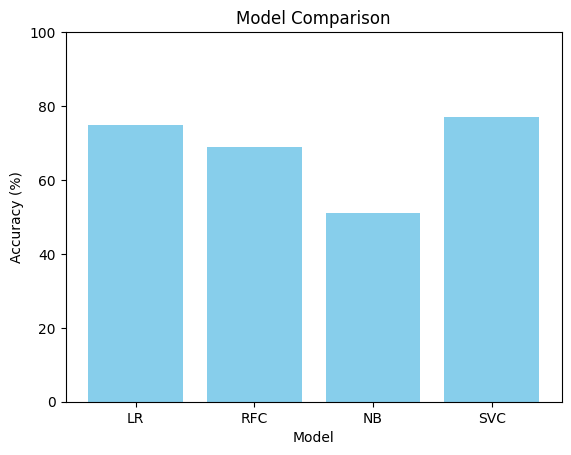

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the dictionary and DataFrame
d = {'model': ['LR', 'RFC', 'NB', 'SVC'],
     'result': [75, 69, 51, 77]}
print(d)

pf = pd.DataFrame(d)
print(pf)  # Display the DataFrame

# Plotting the bar graph
plt.bar(pf['model'], pf['result'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)  # Optional: set y-axis from 0 to 100
plt.show()


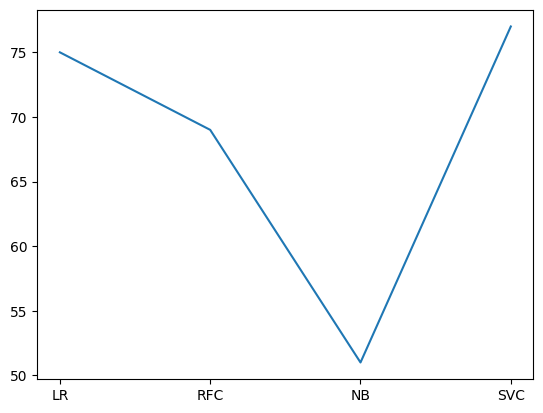

In [87]:
plt.plot(pf['model'],pf['result'])